In [1]:
!pip install nlplot

In [21]:
import pandas as pd

#ファイル読み込み 
df = pd.read_csv('label_order_icl_LS6-7.csv')

#表示
df

,LS,label(大)
0,6-1,AQ Music S-Speech S-Speech Music GP Music GP M...
1,6-2,S-Speech Music S-Speech AQ AQ Music Music Musi...
2,6-3,AQ S-Speech GSI Music GSI Music GF S-Speech GF...
3,6-4,GF Music GSI S-Speech Music GOI GF Music S-Spe...
4,6-5,Music S-Speech AQ S-Speech AQ Music GSI S-Spee...
5,7-1,GSI S-Speech GSI S-Speech GSI S-Speech AQ Musi...
6,7-2,Music GOI Music S-Speech Music S-Speech Music ...
7,7-3,Music AQ Music GP Music GSI GF Music S-Speech ...


In [22]:
#Bigramの抽出
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt
%matplotlib inline

npt = nlplot.NLPlot(df, target_col='label(大)')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# ストップワーズ
stopwords = npt.get_stopword(top_n=0, min_freq=0)

#単語頻出ランキングを作成
fig_unigram = npt.bar_ngram(
title='bigram',
xaxis_label='word_count',
yaxis_label='word',
ngram=2,
top_n=100,
#stopwords=stopwords,
)
#単語頻出ランキングを表示
fig_unigram.show()

100%|███████████████████████████████████████████| 8/8 [00:00<00:00, 7511.63it/s]


In [85]:
#共起ネットワーク図作成
#min_edge_frequencyの設定が難しい、有向グラフの方が良い。
#iplotをインポートして使えば結果が表示される
from plotly.offline import iplot

# ビルド（データ件数によっては処理に時間を要します）
npt.build_graph(min_edge_frequency=3, stopwords=stopwords)

# ビルド後にノードとエッジの数が表示される。ノードの数が100前後になるようにするとネットワークが綺麗に描画できる
#>> node_size:63, edge_size:63

fig_co_network = npt.co_network(
    title='Co-occurrence network',
    sizing=70,
    node_size='adjacency_frequency',
    color_palette='hls',
    width=600,
    height=500,
    save=False
)
iplot(fig_co_network)

display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(None), npt.edge_df.shape
)

node_size:8, edge_size:28


,id,id_code,adjacency_frequency,betweeness_centrality,clustering_coefficient,community
0,Music,0,7,0.0,1.0,0
1,GF,1,7,0.0,1.0,0
2,GSI,2,7,0.0,1.0,0
3,GOI,3,7,0.0,1.0,0
4,GP,4,7,0.0,1.0,0


(8, 6)

,source,target,edge_frequency,source_code,target_code
0,Music,S-Speech,9,0,6
1,GP,S-Speech,9,4,6
2,GP,Music,9,4,0
3,GOI,S-Speech,8,3,6
4,GOI,Music,8,3,0
5,GSI,S-Speech,8,2,6
6,GSI,Music,8,2,0
7,GP,GSI,8,4,2
8,GOI,GP,8,3,4
9,GF,Music,7,1,0


(28, 5)

# 有向グラフの作成１-graphviz

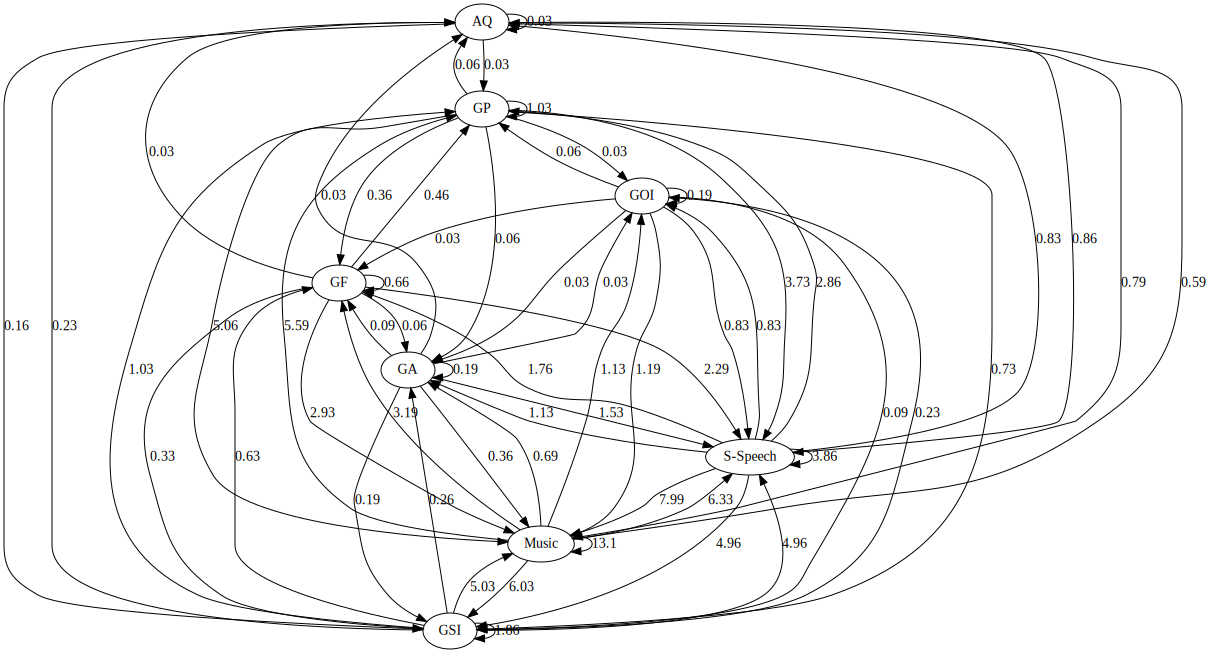

In [121]:
#参考：https://japbros-poco.main.jp/archives/5918
from graphviz import Digraph

G = Digraph(format="png")
G.attr("node")#, shape="circle"

#ファイル読み込み：名前を確認すること
with open("bigram_icl_後期レッスン.csv") as f:
    adj = [[j.replace("\n","") for j in i.split(",")[1:]] for i in f.readlines()]


edges = {((node,adj[0][c])): int(j) for i,node in enumerate(adj[0]) for c,j in enumerate(adj[i+1]) if int(j) != 0}
edge_labels = list(edges.values())
for i,j in edges:
    G.edge(str(i), str(j), label=str(edges[(i,j)]/sum(edge_labels)*100)[:4]) #最後の数字、max(edge_labels))[:4]

#出力：名前を確認すること
G.render("./graphviz/有向グラフ(ICL)_後期レッスン")
G

# 有向グラフの作成２-networkx

In [1]:
!pip install japanize_matplotlib

In [3]:
#ファイル読み込み
import pandas as pd
d1 = pd.read_csv('co-occurrence_itl_initial.csv', encoding='shift-jis')
d1

,Unnamed: 0,Source,Target,Ratio
0,1,expression,expression,8.43
1,2,technique,S-Speech,8.32
2,3,S-Speech,technique,8.01
3,4,technique,technique,7.80
4,5,S-Speech,Music,6.74
5,6,Music,S-Speech,5.37
6,7,Music,technique,5.27
7,8,Music,expression,5.16
8,9,technique,Music,4.95
9,10,Music,Music,4.21


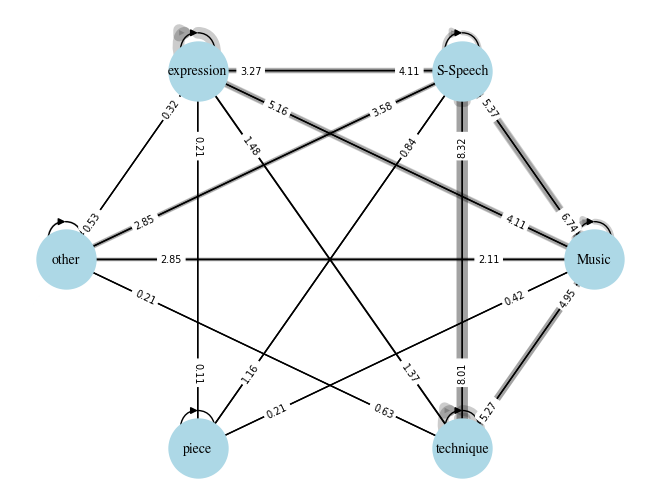

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

def make_graph(G, nodes, edges, pos, node=True, label=True, edge=True, edge_label=True):
    # nodeデータの追加
    G.add_nodes_from(nodes)
 
    # edgeデータの追加
    G.add_weighted_edges_from(edges)
    weight=nx.get_edge_attributes(G,'weight')#双方向それぞれの値にする（重み付けしない）
   
    if not isinstance(pos, dict):
        pos = pos(G)
    
    # ネットワークの可視化
    nx.draw(G, pos=pos)
    if node:
        nx.draw_networkx_nodes(G, pos=pos, node_size=550, node_shape='o', #alpha=0.5,
                               node_color='lightblue', linewidths=20)
    if label:
        nx.draw_networkx_labels(G, pos=pos, font_size=10, font_family='Times')
                                #font_color='black')
    if edge:
        nx.draw_networkx_edges(G, pos=pos, width=list(weight.values()), alpha=0.2)#,
                               #connectionstyle="arc3,rad=0.2")#connectionstyle:エッジにカーブをつける
    if edge_label:
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=weight,
                                     label_pos=0.2, font_size=7) #エッジのラベルを描画

G1 = nx.DiGraph()
nodes = np.unique([d1.Source]+[d1.Target])
edges = [(d1.loc[i, 'Source'], d1.loc[i, 'Target'], d1.loc[i, 'Ratio']) for i in range(len(d1))]


make_graph(G1, nodes, edges, pos=nx.circular_layout)

#出力先を変更する
#nx.draw(G)
plt.savefig("./networkx/itl_initial.png")

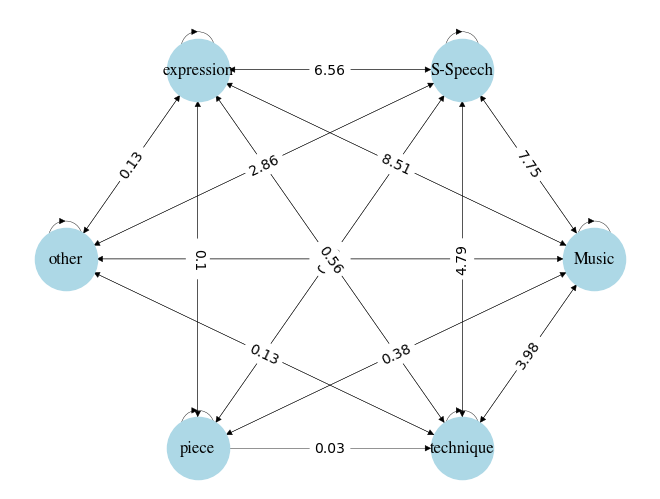

In [202]:
#エッジに重みをつけた場合

styles = {'node_size':2000,
          'font_size':12,
          'node_color':'lightblue',
          'with_labels':True,
          #'font_weight':'bold',
          'font_family':'Times',
          'width':0.3
         }#edgeの太さ

def make_graph(G, nodes, edges, pos, styles=styles, label=True):
    # nodeデータの追加
    G.add_nodes_from(nodes)
 
    # edgeデータの追加
    G.add_weighted_edges_from(edges)
    edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
    #edge_labels = {(i, j):(d1.loc[i, 'Source'], d1.loc[i, 'Target'])}
   
    if not isinstance(pos, dict):
        pos = pos(G)
    
    # ネットワークの可視化
    nx.draw(G, pos=pos, **styles)
    if label:
        nx.draw_networkx_edge_labels(G1, pos=pos, edge_labels=edge_labels) #エッジのラベルを描画

import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np

G1 = nx.DiGraph()
nodes = np.unique([d1.Source]+[d1.Target])
edges = [(d1.loc[i, 'Source'], d1.loc[i, 'Target'], d1.loc[i, 'Ratio']) for i in range(len(d1))]

make_graph(G1, nodes, edges, pos=nx.circular_layout)